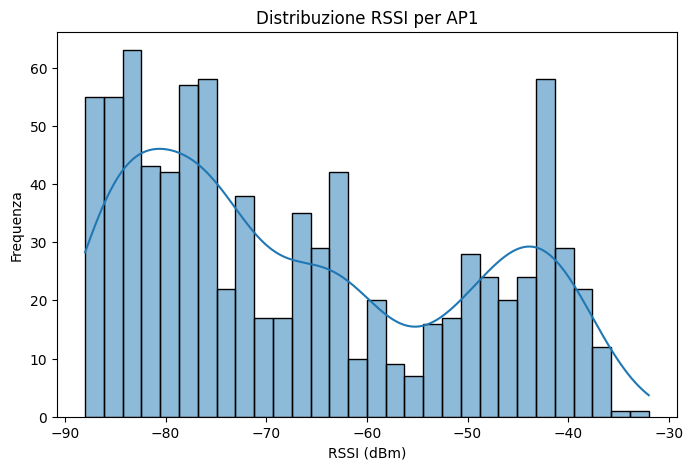

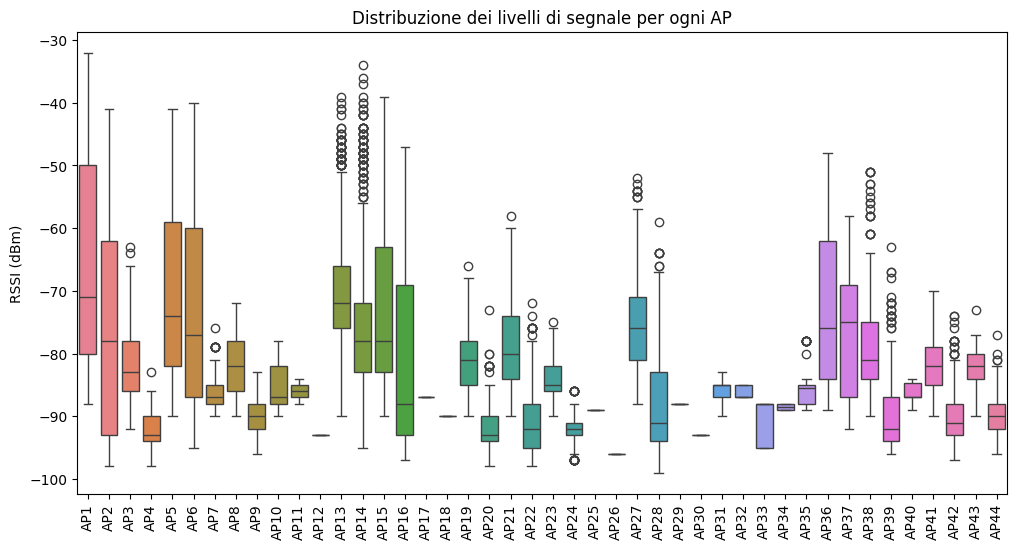

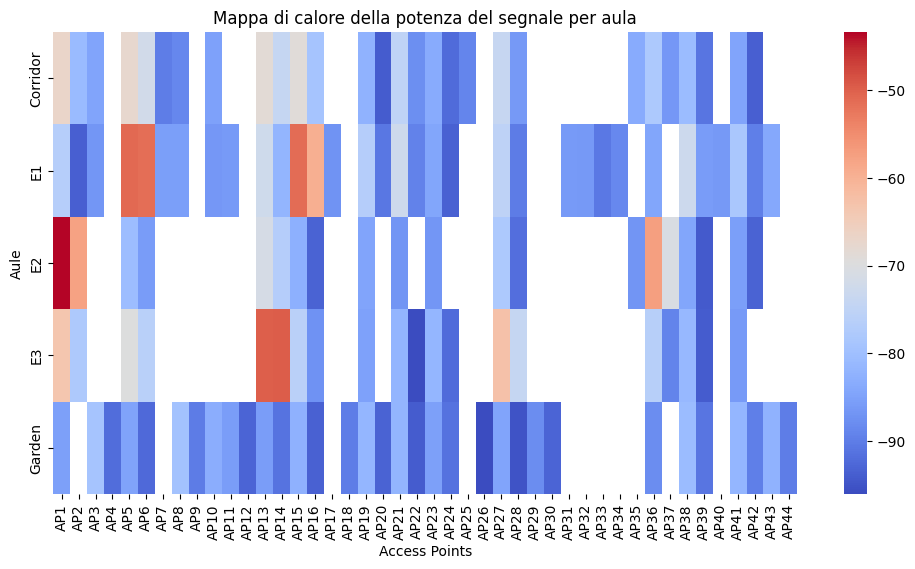

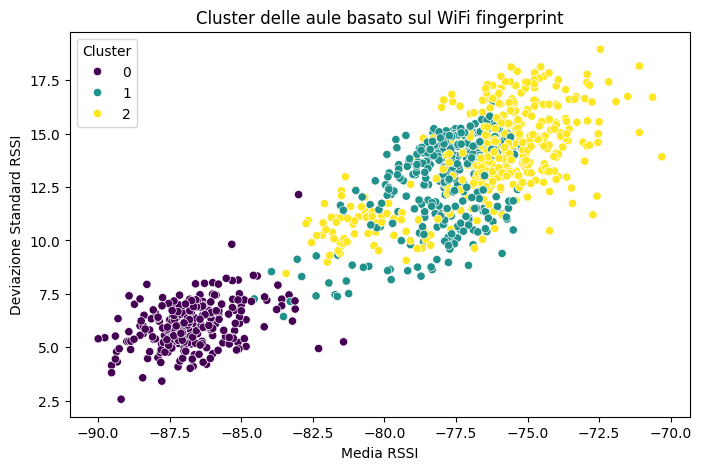

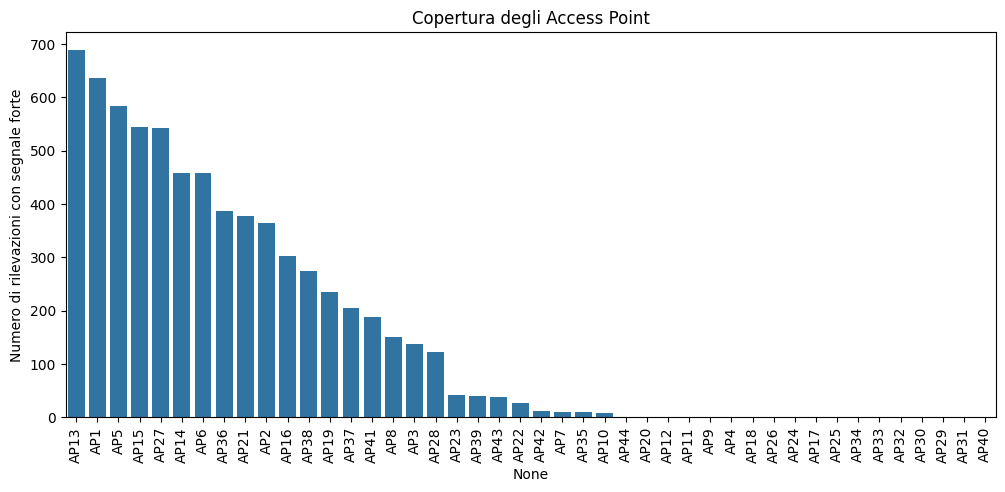

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Caricamento del dataset
file_path = "../../data/processed/wifi_fingerprinting_dataset.csv"
df = pd.read_csv(file_path)

# Rimozione delle colonne non numeriche
ap_columns = [col for col in df.columns if "AP" in col]

# 1. Istogramma della distribuzione dell’RSSI per un determinato AP
ap_to_plot = "AP1"
plt.figure(figsize=(8, 5))
sns.histplot(df[ap_to_plot].dropna(), bins=30, kde=True)
plt.title(f"Distribuzione RSSI per {ap_to_plot}")
plt.xlabel("RSSI (dBm)")
plt.ylabel("Frequenza")
plt.show()

# 2. Boxplot per confrontare la distribuzione dei segnali tra diversi AP
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[ap_columns])
plt.xticks(rotation=90)
plt.title("Distribuzione dei livelli di segnale per ogni AP")
plt.ylabel("RSSI (dBm)")
plt.show()

# 3. Heatmap della potenza del segnale per ogni aula
pivot_df = df.groupby("Aula")[ap_columns].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False)
plt.title("Mappa di calore della potenza del segnale per aula")
plt.xlabel("Access Points")
plt.ylabel("Aule")
plt.show()

# 4. Clustering delle aule basato sulla fingerprint WiFi
X = df[ap_columns].fillna(-100)  # Sostituiamo i NaN con un valore di segnale basso
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[ap_columns].mean(axis=1), y=df[ap_columns].std(axis=1), hue=df["Cluster"], palette="viridis")
plt.xlabel("Media RSSI")
plt.ylabel("Deviazione Standard RSSI")
plt.title("Cluster delle aule basato sul WiFi fingerprint")
plt.show()

# 5. Analisi della copertura degli AP
coverage = (df[ap_columns] > -80).sum().sort_values(ascending=False)  # Conta le rilevazioni sopra -80 dBm
plt.figure(figsize=(12, 5))
sns.barplot(x=coverage.index, y=coverage.values)
plt.xticks(rotation=90)
plt.title("Copertura degli Access Point")
plt.ylabel("Numero di rilevazioni con segnale forte")
plt.show()
